In [1]:
# Baixa as entradas X.npy
!gdown https://drive.google.com/uc?id=1oSRay8phFA91RJoGH0tMmj86LBovKj73

# Baixa as saídas desejadas Y.npy
!gdown https://drive.google.com/uc?id=1_BQLcsgcYYsubtv4M80BVm4BEknrTOr7

Downloading...
From: https://drive.google.com/uc?id=1oSRay8phFA91RJoGH0tMmj86LBovKj73
To: /content/X.npy
33.8MB [00:00, 81.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_BQLcsgcYYsubtv4M80BVm4BEknrTOr7
To: /content/Y.npy
100% 165k/165k [00:00<00:00, 5.25MB/s]


In [0]:
# Importa as principais bibliotecas que usaremos
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split

In [0]:
# Leitura dos dados
X = np.load('X.npy')
Y = np.load('Y.npy')

# Reordena as categorias na ordem correta
# (por motivo que desconheço, os dados
#  originais estavam com as classes fora
#  de ordem -- consistentes e organizadas,
#  mas fora de ordem)
cats = [9,0,7,6,1,8,4,3,2,5]
Y[:,cats] = Y[:,range(10)]

In [4]:
# Aqui conferimos as dimensões dos dados
# dos pares de treinamento
print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

X.shape = (2062, 64, 64)
Y.shape = (2062, 10)


Mostrando 3


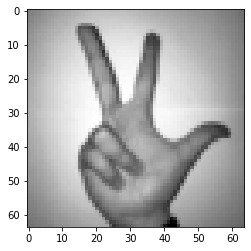

Mostrando 4


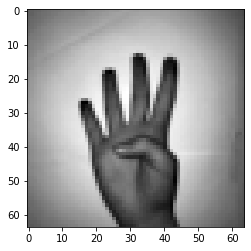

Mostrando 2


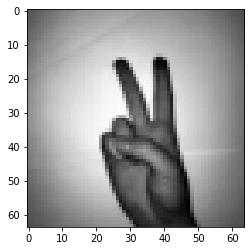

Mostrando 1


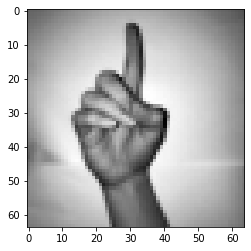

Mostrando 3


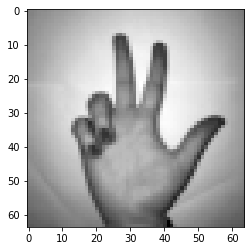

In [5]:
# Total de amostras
total = X.shape[0]

# Mostramos aqui 5 amostras aleatórias
for i in range(5):
  k = np.random.randint(0,total)
  print('Mostrando',np.argmax(Y[k,:]))
  plt.imshow(X[k,:,:], cmap='gray')
  plt.show()

In [0]:
# Função train_test_split é "uma mão na roda"
# Essa função já embaralha (shuffle) e separa dados
# de treinamento e validação.
X, X_test, Y, Y_test = train_test_split(X, Y, \
                                        test_size=int(total/10), \
                                        random_state=42)

In [7]:
# Vamos conferir como ficaram as dimensões
# dos tensores após a divisão
print('X.shape =',X.shape)
print('Y.shape =',Y.shape)
print('X_test.shape =',X_test.shape)
print('Y_test.shape =',Y_test.shape)

X.shape = (1856, 64, 64)
Y.shape = (1856, 10)
X_test.shape = (206, 64, 64)
Y_test.shape = (206, 10)


In [0]:
# Aqui fazemos um pequeno ajuste. Acontece
# que o Keras espera que tensores que representam
# datasets de imagens tenham canais de cores. Por
# isso espera 4 dimensões:
#         amostra, linhas, colunas, canais
# Como essas imagens são monocromáticas, precisamos
# adicionar um canal único
X = X.reshape(X.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [9]:
# Agora conferimos novamente as dimensões
print('X.shape =',X.shape)
print('Y.shape =',Y.shape)
print('X_test.shape =',X_test.shape)
print('Y_test.shape =',Y_test.shape)

X.shape = (1856, 64, 64, 1)
Y.shape = (1856, 10)
X_test.shape = (206, 64, 64, 1)
Y_test.shape = (206, 10)


Exercício do aluno a partir daqui...

### Criação do modelo da rede neural


* Rede Convolucional


1. Camada convolucional com 16 neurônios
2. Camada de MaxPooling
3. Camada convolucional com 32 neurônios
4. Camada de MaxPooling
5. Camada convulucional de 64 neurônios
6. Camada de MaxPooling
7. Camada de Flatten

* Rede estilo perceptron
1. Camada de 128 neurônios
2. Camada de 64 neurônios
3. Camada de saída com 10 saídas usando a funcão de ativação Softmax







In [0]:
p = tf.keras.models.Sequential([
      # 1 Camada Convolucional
      tf.keras.layers.Conv2D(16, (2, 2), activation='relu',
                             input_shape=(64, 64, 1)),
      # Camada Max Pooling
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
      # Camada Convolucionaol
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      # Camada MaxPooling
      tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(3,3), padding='same'),
      # Camada Convolucional
      tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
      # Camada MaxPooling
      tf.keras.layers.MaxPooling2D(pool_size=(5,5), strides=(5,5), padding='same'),
      # Serialização (achatamento)
      tf.keras.layers.Flatten(),
      # Camada escondida de 128 neurônios
      tf.keras.layers.Dense(128, activation='relu'),
      # Camada escondida de 64 neurônios
      tf.keras.layers.Dense(64, activation='relu'),
      # Camada de saída softmax
      tf.keras.layers.Dense(10, activation='softmax')
    ])

### Mostrando a estrutura da Rede Neural

In [11]:
p.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

### Compilando o modelo da rede passando a função de custo, o metódo de otimização e uma métrica

In [0]:
p.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

### Fazendo o treinamento da rede

In [13]:
# Treinamento da rede neural
loss_val = []
accuracy_val = []
loss_test = []
accuracy_test = []
for i in range(10):
  h = p.fit(X, Y, 
        batch_size=32, epochs=10, 
        validation_data=(X_test, Y_test),
        shuffle=True)
  loss_val.append(h.history['loss'])
  accuracy_val.append(h.history['accuracy'])
for i in range(10):
  h = p.fit(X, Y, 
      batch_size=32, epochs=10, 
      validation_data=(X, Y),
      shuffle=True)
  loss_test.append(h.history['loss'])
  accuracy_test.append(h.history['accuracy'])

Epoch 1/10
58/58 [==============================] - 1s 10ms/step - loss: 2.3013 - accuracy: 0.1164 - val_loss: 2.2816 - val_accuracy: 0.2913
Epoch 2/10
58/58 [==============================] - 0s 6ms/step - loss: 1.8731 - accuracy: 0.3745 - val_loss: 1.0730 - val_accuracy: 0.6505
Epoch 3/10
58/58 [==============================] - 0s 6ms/step - loss: 0.7592 - accuracy: 0.7522 - val_loss: 0.5468 - val_accuracy: 0.8155
Epoch 4/10
58/58 [==============================] - 0s 6ms/step - loss: 0.3982 - accuracy: 0.8728 - val_loss: 0.2681 - val_accuracy: 0.9175
Epoch 5/10
58/58 [==============================] - 0s 6ms/step - loss: 0.2690 - accuracy: 0.9143 - val_loss: 0.2127 - val_accuracy: 0.9563
Epoch 6/10
58/58 [==============================] - 0s 6ms/step - loss: 0.1841 - accuracy: 0.9450 - val_loss: 0.1873 - val_accuracy: 0.9320
Epoch 7/10
58/58 [==============================] - 0s 6ms/step - loss: 0.1405 - accuracy: 0.9564 - val_loss: 0.1411 - val_accuracy: 0.9709
Epoch 8/10
58/58 [=

### Plotando a evolução da função de custo

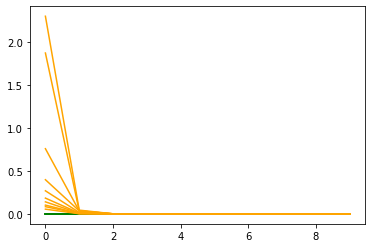

In [20]:
from matplotlib import pyplot as plt
plt.plot(loss_test, color='green')
plt.plot(loss_val, color='orange')
plt.show()

### Plotando a evolução da accuracy

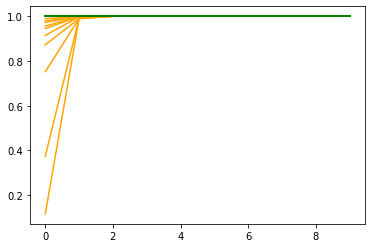

In [21]:
from matplotlib import pyplot as plt

# Plotamos o gráfico da evolução do erro
# no tempo. Esta é a chamada "curva de
# aprendizagem"
plt.plot(accuracy_val, color='orange')
plt.plot(accuracy_test, color = 'green')
plt.show()

### Mostrando a taxa de acerto da rede neural para dados de treinamento e para dados de validação

In [22]:
loss, accuracy = p.evaluate(X, Y, verbose=0)

print('Taxa de acerto nos dados de treinamento:', \
      100*accuracy, '%')

loss, accuracy = p.evaluate(X_test, Y_test, verbose=0)

print('Taxa de acerto nos dados de validação:', \
      100*accuracy, '%')

Taxa de acerto nos dados de treinamento: 100.0 %
Taxa de acerto nos dados de validação: 98.05825352668762 %


Demostrando a funcionalidade da rede para 10 imagens aleatórias

É pra ser o numero: 8


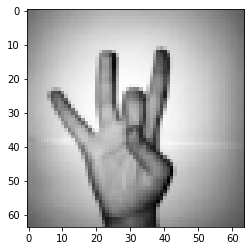

É pra ser o numero: 3


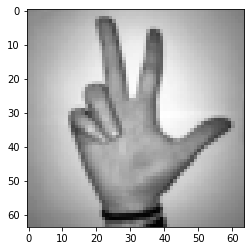

É pra ser o numero: 9


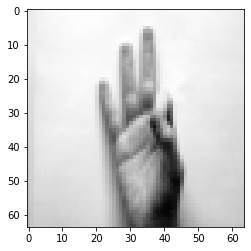

É pra ser o numero: 4


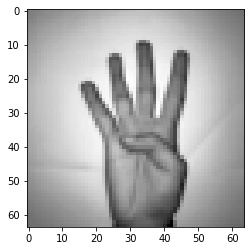

É pra ser o numero: 5


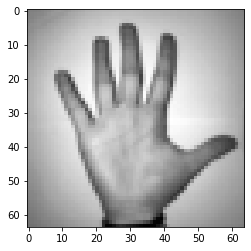

É pra ser o numero: 6


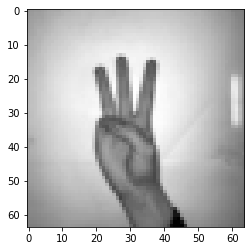

É pra ser o numero: 4


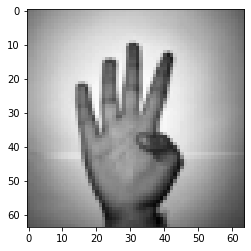

É pra ser o numero: 4


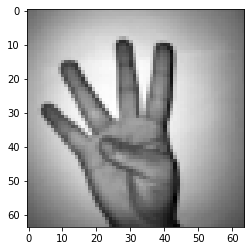

É pra ser o numero: 1


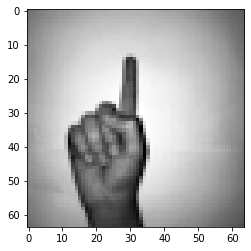

É pra ser o numero: 4


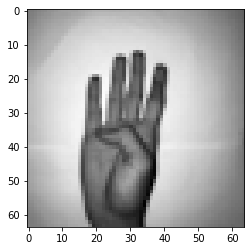

In [23]:
total = X_test.shape[0]
for i in range(10):
  random = np.random.randint(0, total)
  x = X_test[random, :, :].reshape(1, 64, 64, 1)
  y = p.predict(x)
  print("É pra ser o numero:", np.argmax(y))
  plt.imshow(x[0,:,:,0], cmap='gray')
  plt.show()